### Knowing 1D elliptical FT doesn't work, let's expend it to the whole plane

plot the FT of range(0,1.6,0.2) on the same plot. see any pattern

In [1]:

import numpy as np

import scipy as scipy
from scipy import interpolate
from scipy.fft import fft, ifft
import copy


import matplotlib.pyplot as plt
import math

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

import polarTransform

from marvin.tools import Maps

from tqdm import tqdm

import Bicone_Classifier


[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: Passing field metadata as keyword arguments is deprecated. Use the explicit `metadata=...` argument instead. Additional metadata: {'location': 'view_args'} (RemovedInMarshmallow4Warning)
[WARNING]: The 'missing' argument to fields is deprecated. Use 'load_default' instead. (RemovedInMarshmallow4Warning)


In [75]:
np.linspace(0.4, 1.8, 8)


array([0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])

In [4]:
plateifu = '7975-12705'
ellip = Bicone_Classifier.ellip_gen(plateifu)

In [42]:
ring = copy.deepcopy(ellip)
# Inherent the output of the ellip_gen function
ew_re_comb = ring[0]
theta = ring[1]


# Make non-ring data = 0, then output the EW only
# First sort the data as pairs of (oiii, r_er) 
for i in  ew_re_comb.T :
    # j is the r_er
    for j in i:
        # set zeros outside of the range 
        if j[1] < 2 or j[1] > 2.2:
            j[0] = 0
        else:
            pass

# Output: zeros except for Ring of EW

# From now on, we only care about the EW distribution along the phi direction
# So we 
# 1. make a tuple in the format of (phi, EW).
# 2. Select non-zero EW elements.
# 3. Interpolate the phi vs. EW to 500
# 4. make the curve EW curve plot

# Sort the data as pairs of (phi), (oiii) 

'''
theta_EW = np.array((theta, ew_re_comb[0]))

EW_stacked = []

# Sort the data as pairs of (phi, oiii) 
for i in theta_EW.T:
    # j[1] would be the oiii
    for j in i:
        if j[1] != 0:
            EW_stacked.append(j)
        else:
            pass

# Turn the list to array
EW_curve = np.array(EW_stacked)


# Sort the EW along phi direction
#EW_sort = EW_curve[EW_curve[:, 0].argsort()]
'''

'\ntheta_EW = np.array((theta, ew_re_comb[0]))\n\nEW_stacked = []\n\n# Sort the data as pairs of (phi, oiii) \nfor i in theta_EW.T:\n    # j[1] would be the oiii\n    for j in i:\n        if j[1] != 0:\n            EW_stacked.append(j)\n        else:\n            pass\n\n# Turn the list to array\nEW_curve = np.array(EW_stacked)\n\n\n# Sort the EW along phi direction\n#EW_sort = EW_curve[EW_curve[:, 0].argsort()]\n'

In [63]:
mid = round(ring[0][1].shape[1]/2)
out_max = ring[0][1][mid].max()
zero_l = np.linspace(0, out_max, 9)
zero_l[1:-1]

array([0.26398625, 0.5279725 , 0.79195875, 1.055945  , 1.31993125,
       1.5839175 , 1.84790375])

0.6
0.8
1.0
1.2
1.4
1.6
1.8
2.0


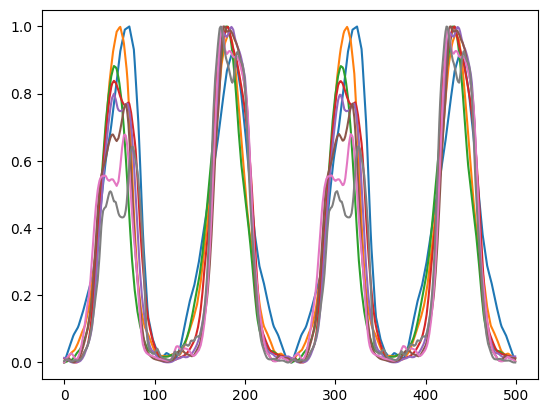

In [12]:
plateifu = '7958-9101'
ellip = Bicone_Classifier.ellip_gen(plateifu)

#mid = round(ring[0][1].shape[1]/2)
#out_max = ring[0][1][mid].max()
#zero_l = np.linspace(0, out_max, 9)



#for i in zero_l[1:-1]:
for i in np.linspace(0.6, 2, 8):
    start, end = round(i,1), round(i,1)+0.3
    print(start)
    curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)

    plt.plot(curve)
    #result = Bicone_Classifier.fourier_classifier(curve)
    #print(result[1], result[2])
    #plt.plot(result[0])
    
plt.show()


## Now Scale it up!


 min = 222

In [31]:
PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data['plateifu']

for data in hdu:

    ellip = Bicone_Classifier.ellip_gen(data)
    loss_list = []
    
    for i in np.linspace(0.6, 2, 8):
        start, end = round(i,1), round(i,1)+0.3
        curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)
        result = Bicone_Classifier.fourier_classifier(curve)

        if result[1] == 3:
            loss_list.append(result[2])
        else:
            pass
    print(data)
    print(sum(loss_list))



        


        


[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits' mode='rb' closefd=True> (ResourceWarning)


7958-9101
786.3994062587551
7972-3704
780.2053818922438
8138-6101
458.6350905403574
8252-9101
278.5252747117525
8465-12704
561.1009248387294
8486-12705
454.95051620622326
8715-6103
502.15330230301606
8718-12702
470.9164257341791
9031-12704
273.0374178702929
9867-9102
369.66784134305897
10502-12701
447.82963753562353
10517-3701
685.7581239003204
10518-3704
635.0911646329868
11826-6103
314.79950932449134
11958-3703
222.63458731249648
12673-6101
397.11713527148095
12700-6101
614.1528939571169


## Check the alignment of the bicone axis


max loss = 225


[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits' mode='rb' closefd=True> (ResourceWarning)


7958-9101
95.04


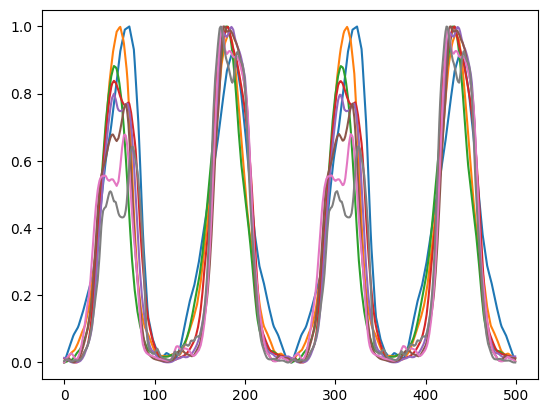

7972-3704
80.64000000000017


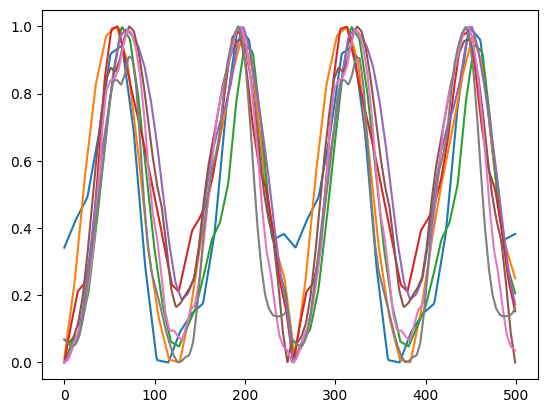

8138-6101
162.72000000000006


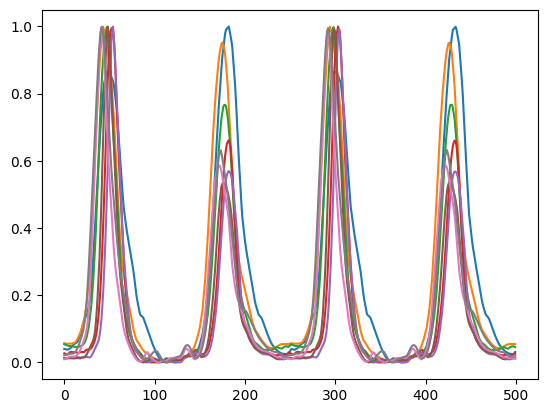

8252-9101
76.32000000000008


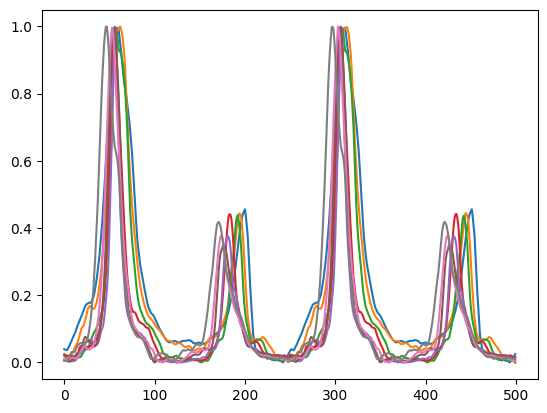

8465-12704
221.76000000000002


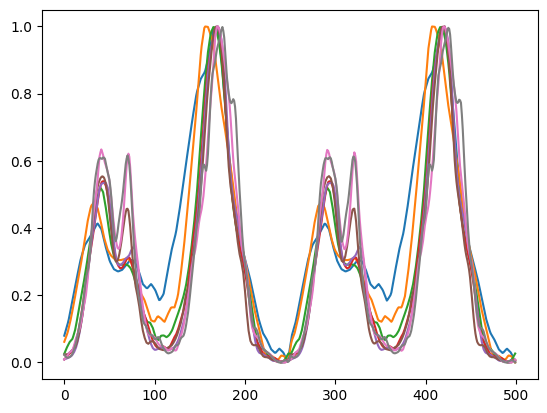

8486-12705
74.88000000000004


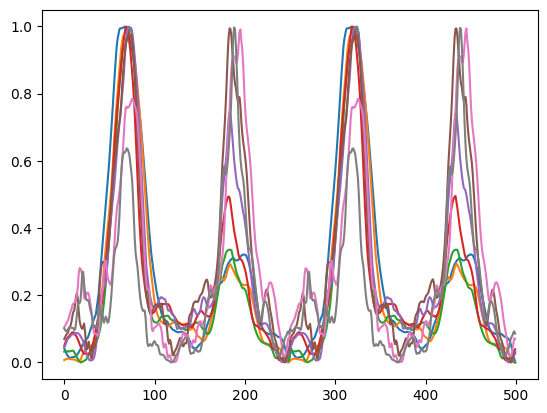

8715-6103
92.1600000000001


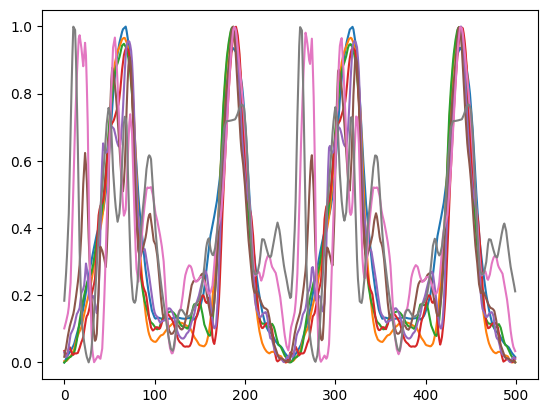

8718-12702
205.92000000000002


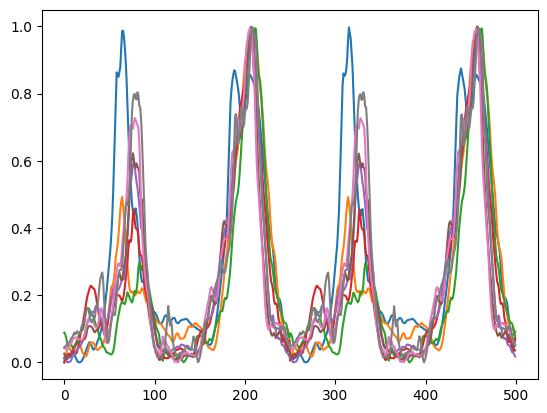

9031-12704
41.76000000000009


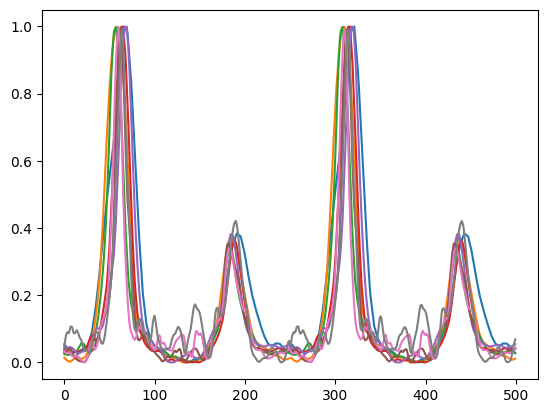

9867-9102
63.36000000000007


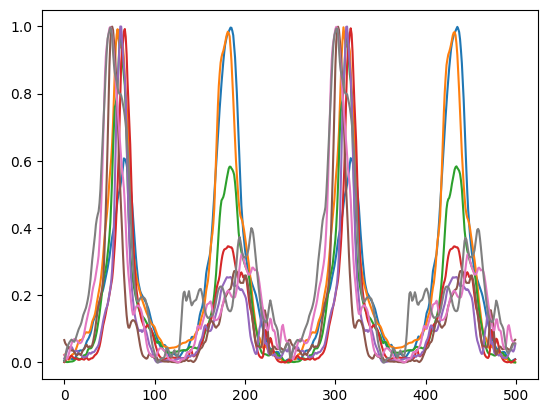

10502-12701
28.800000000000182


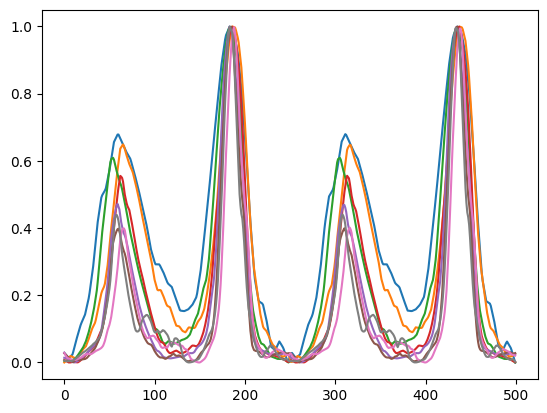

10517-3701
80.63999999999993


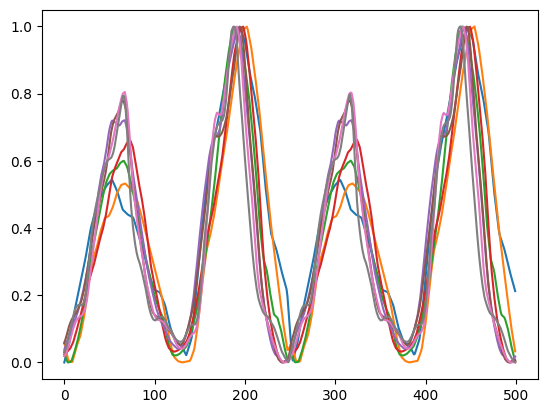

10518-3704
126.72000000000003


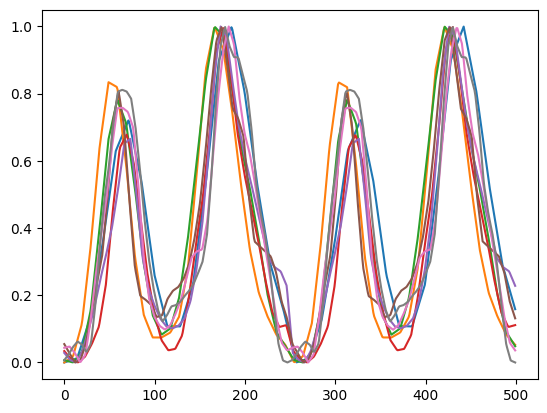

11826-6103
83.52000000000007


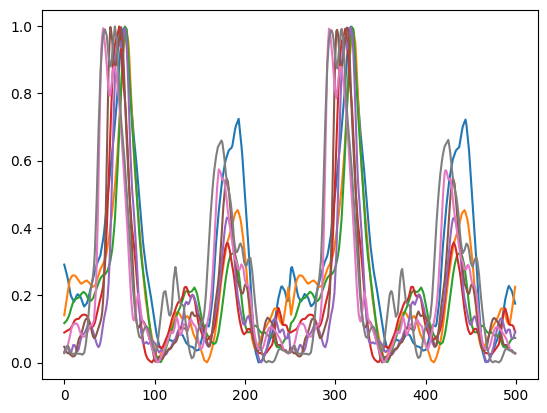

11958-3703
136.8000000000001


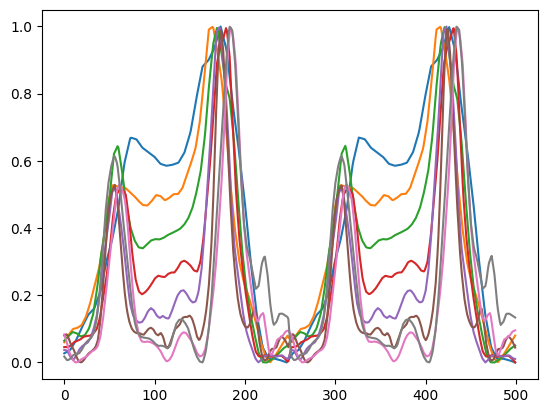

12673-6101
184.32


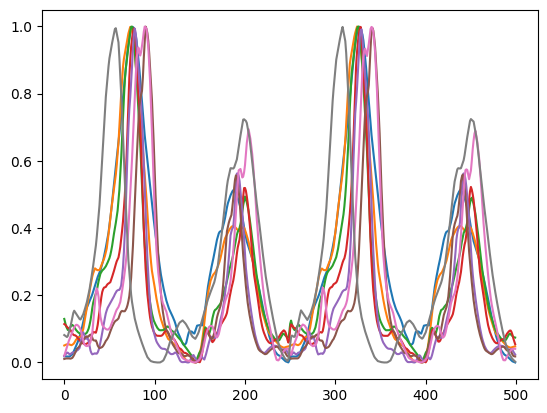

12700-6101
138.24


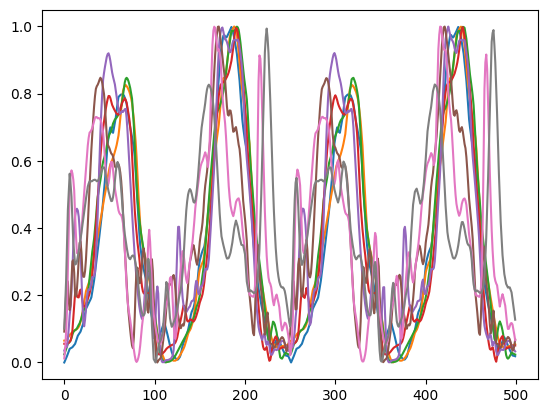

In [29]:
PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data['plateifu']

for data in hdu:
    
    print(data)
    ellip = Bicone_Classifier.ellip_gen(data)
    axis_loss = []
    for i in np.linspace(0.6, 2, 8):
        start, end = round(i,1), round(i,1)+0.3
        curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)
        result = Bicone_Classifier.fourier_classifier(curve)

        plt.plot(curve)
        
        residue = (720*(result[3]/500))-90 # to 360*2 angle, diff to zero, positive
        loop_residue = min([residue%180, abs(residue-180)])
        abs_residue = min([loop_residue%180, abs(loop_residue-180)])
        axis_loss.append(abs_residue)
    
    print(sum(axis_loss))

    plt.show()


## Now iterate the list and select

In [34]:
PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/bicone_candidates_Full_v1.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data['plateifu']


axis_list = []
axis_index = []
miss_list = []

for data in tqdm(hdu):
    try:
        ellip = Bicone_Classifier.ellip_gen(data)
        axis_loss = []
        for i in np.linspace(0.6, 2, 8):
            start, end = round(i,1), round(i,1)+0.3
            curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)
            result = Bicone_Classifier.fourier_classifier(curve)

            plt.plot(curve)

            residue = (720*(result[3]/500))-90 # to 360*2 angle, diff to zero, positive
            loop_residue = min([residue%180, abs(residue-180)])
            abs_residue = min([loop_residue%180, abs(loop_residue-180)])
            axis_loss.append(abs_residue)

        total_axis_loss = sum(axis_loss)

        if total_axis_loss <= 225:
            axis_list.append(data)
            axis_index.append(total_axis_loss)
        else:
            pass
    except:
        miss_list.append(data)
    



100%|██████████| 1112/1112 [53:50<00:00,  2.90s/it] 


In [35]:
c1 = fits.Column(name='plateifu', array=np.array(axis_list), format='20A')
c2 = fits.Column(name='BiconeIndex', array=np.array(axis_index), format='20A')
t = fits.BinTableHDU.from_columns([c1, c2])
t.writeto('bicone_candidates_Full_v2.fits')

In [38]:
len(miss_list)

0